In [46]:
import networkx as nx
import codecs
import numpy as np
import matplotlib.pyplot as plt

In [51]:
dict_file = codecs.open('cp_output.txt', 'r', 'utf-8')
chara_dict = {}

for line in dict_file:
    name_pair = (line[:-1]).split('\t')
    chara_dict[(name_pair[0],name_pair[1])] = int(name_pair[2])
    
downsize_chara_dict = {}
for i in chara_dict:
    if chara_dict[i] >= 100:
        downsize_chara_dict[i] = np.log(chara_dict[i])
        
downsize_chara_dict

{('占守', '国後'): 4.736198448394496,
 ('択捉', '松輪'): 5.087596335232384,
 ('択捉', '対馬'): 4.762173934797756,
 ('佐渡', '対馬'): 4.77912349311153,
 ('日振', '大東'): 4.700480365792417,
 ('Samuel B. Roberts', 'Gambier Bay'): 4.962844630259907,
 ('神風', '春風'): 5.429345628954441,
 ('神風', '朝風'): 5.0106352940962555,
 ('春風', '朝風'): 4.762173934797756,
 ('朝風', '松風'): 4.882801922586371,
 ('睦月', '如月'): 6.385194398997726,
 ('睦月', '弥生'): 5.480638923341991,
 ('睦月', '卯月'): 5.351858133476067,
 ('睦月', '皐月'): 5.209486152841421,
 ('睦月', '文月'): 5.10594547390058,
 ('睦月', '長月'): 5.170483995038151,
 ('睦月', '菊月'): 5.017279836814924,
 ('睦月', '三日月'): 4.976733742420574,
 ('睦月', '望月'): 5.247024072160486,
 ('睦月', '吹雪'): 6.373319789577012,
 ('睦月', '暁'): 4.8283137373023015,
 ('睦月', '響'): 4.859812404361672,
 ('睦月', '雷'): 4.804021044733257,
 ('睦月', '電'): 4.867534450455582,
 ('睦月', '夕立'): 6.059123195581797,
 ('睦月', '島風'): 4.709530201312334,
 ('睦月', '川内'): 4.700480365792417,
 ('睦月', '金剛'): 4.663439094112067,
 ('睦月', '長門'): 4.7449321283

In [52]:
kanmusu_circle = nx.Graph()

for i in downsize_chara_dict:
    chara_a, chara_b = i
    
    weight = downsize_chara_dict[i]
    kanmusu_circle.add_edge(chara_a, chara_b, weight = weight)

In [53]:
print(nx.info(kanmusu_circle))

Name: 
Type: Graph
Number of nodes: 204
Number of edges: 2101
Average degree:  20.5980


<Figure size 432x288 with 0 Axes>

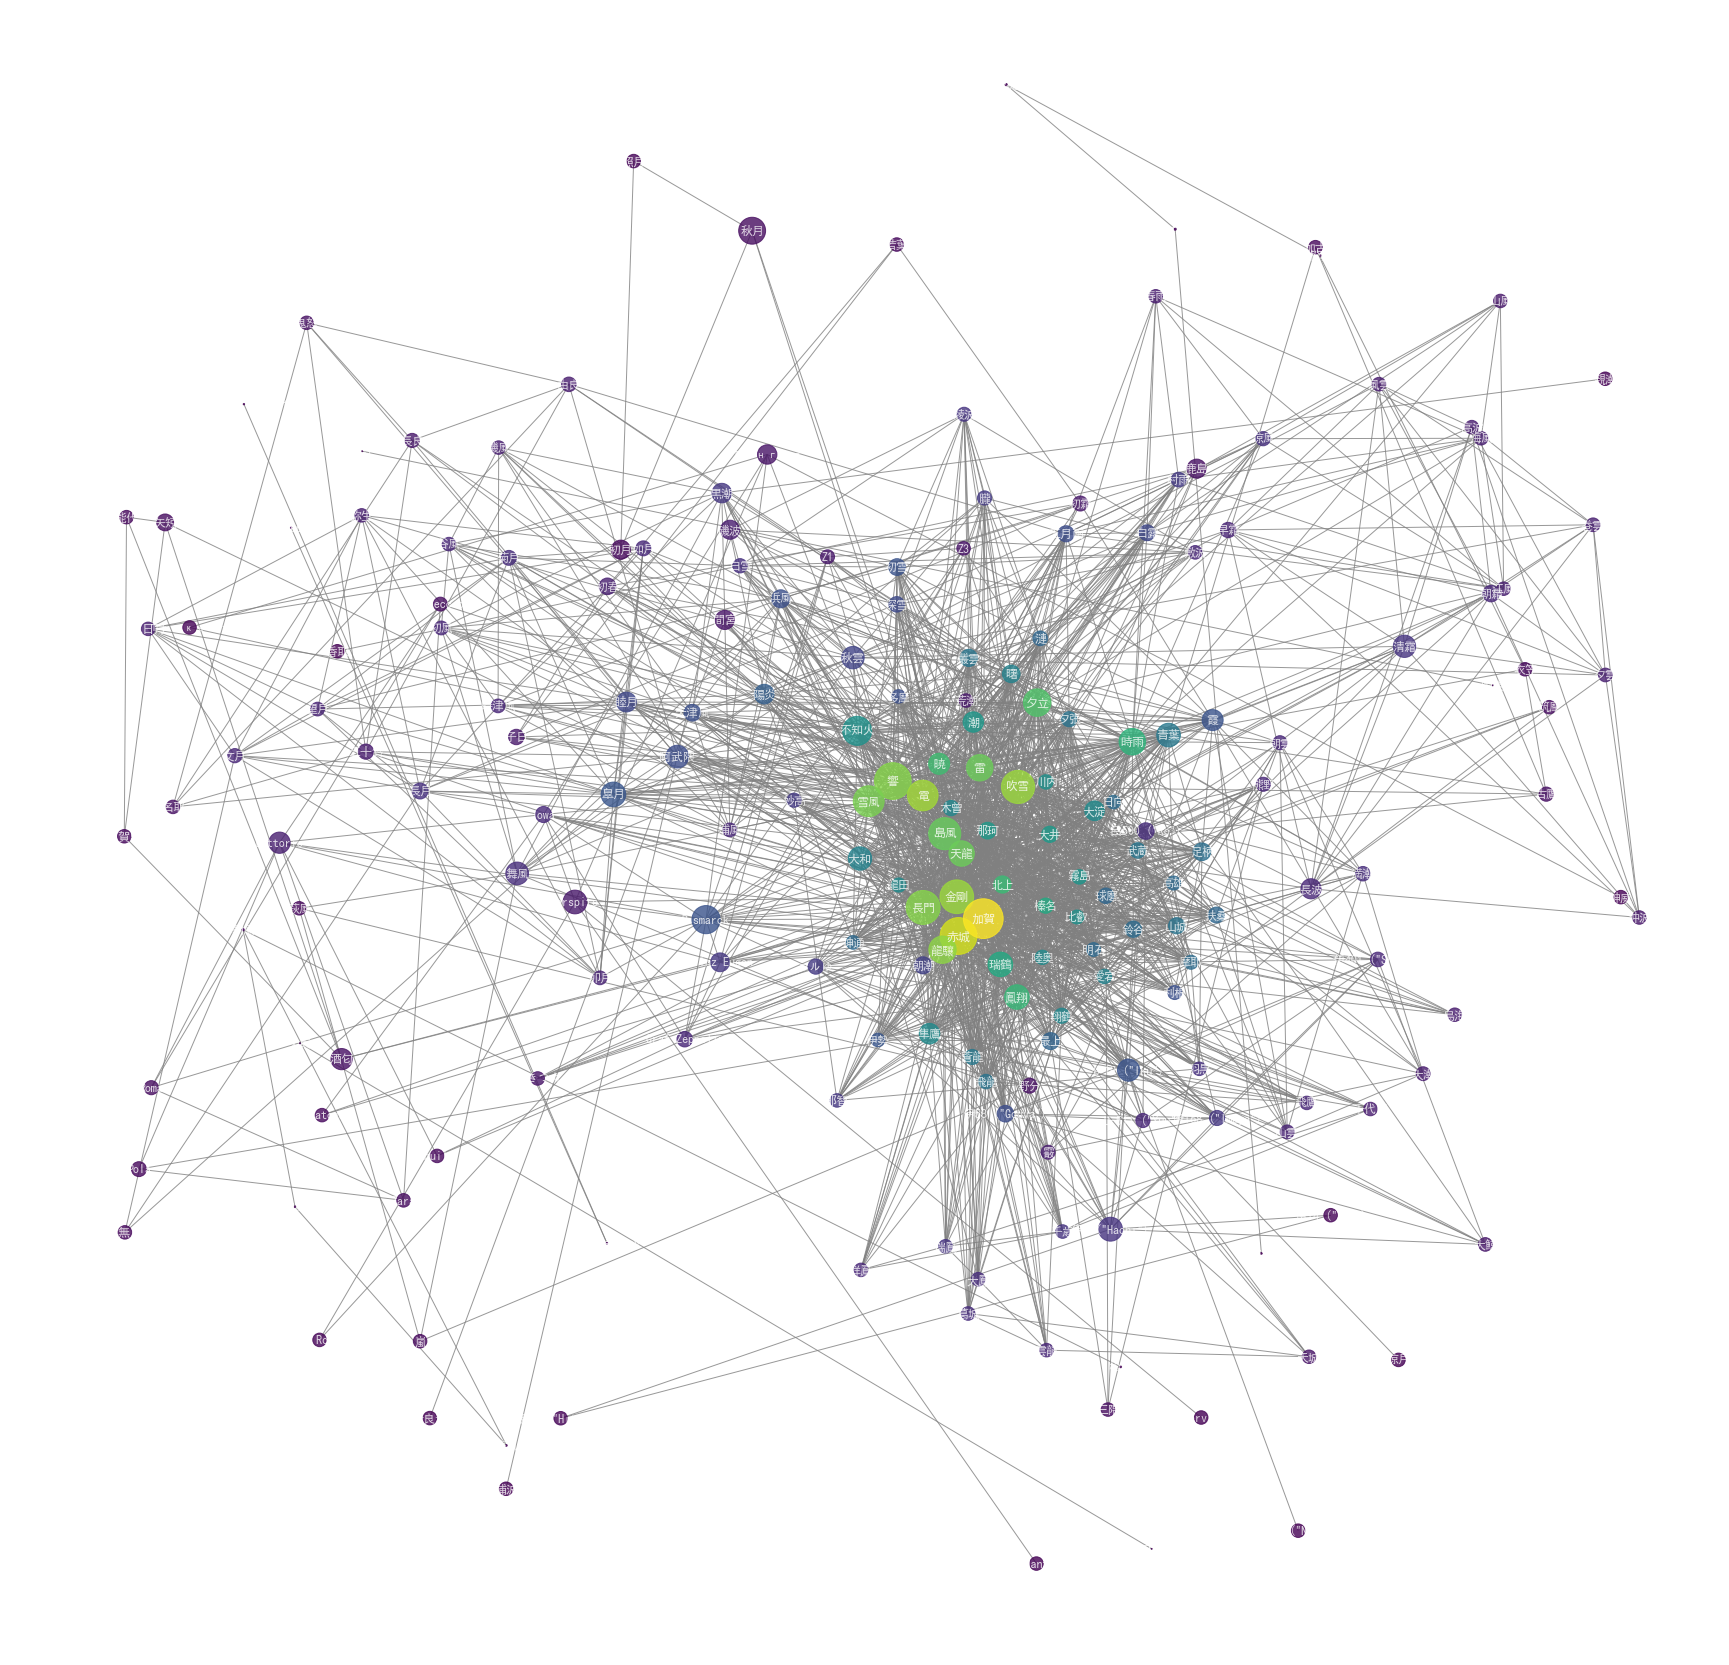

In [56]:
fig = plt.figure()
pos = nx.spring_layout(kanmusu_circle, k=8/np.sqrt(len(kanmusu_circle.nodes())), iterations=20)
betCent = nx.betweenness_centrality(kanmusu_circle, normalized=True, endpoints=True)
node_color = [kanmusu_circle.degree(v) for v in kanmusu_circle]
node_size =  [v * 20000 for v in betCent.values()]
plt.figure(figsize=(30,30))

nx.draw_networkx(kanmusu_circle, pos=pos, with_labels=True,
                 node_color=node_color,
                 alpha = 0.8,
                 node_size=node_size,
                 edge_color='grey',
                 font_family='SimHei',
                 font_color='white',
                 font_size = 12)

fig.set_facecolor('black')
plt.axis('off')
plt.savefig('kantai_relation.png', facecolor=fig.get_facecolor()) 

In [57]:
nx.write_gexf(kanmusu_circle,'relation.gexf')